In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

In [2]:
df = pd.read_csv("E:\Starting-Data-Science\Titanic_project/titanic/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df1 = df.copy()

In [7]:
drop = ["Name", "Ticket", "Cabin", "PassengerId"]

In [8]:
df1.drop(drop, axis= 1, inplace= True)

In [9]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
df1.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
df2 = df1.copy()

In [12]:
df2["Age"].fillna(df2["Age"].median(), inplace= True)
df2["Embarked"].fillna(df2["Embarked"].mode()[0], inplace= True)

In [13]:
df2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
iqr_25 = np.quantile(df2["Fare"], 0.25)
iqr_75 = np.quantile(df2["Fare"], 0.75)
iqr = iqr_75 - iqr_25
limit = 1.5 * iqr
lower = iqr_25 - limit
upper = iqr_75 + limit
df_iqr = df2[((df2["Fare"]) > lower) & (df2["Fare"] < upper)]

In [15]:
iqr_25 = np.quantile(df2["Age"], 0.25)
iqr_75 = np.quantile(df2["Age"], 0.75)
iqr = iqr_75 - iqr_25
limit = 1.5 * iqr
lower = iqr_25 - limit
upper = iqr_75 + limit
df_iqr = df2[((df2["Age"]) > lower) & (df2["Age"] < upper)]

<Axes: >

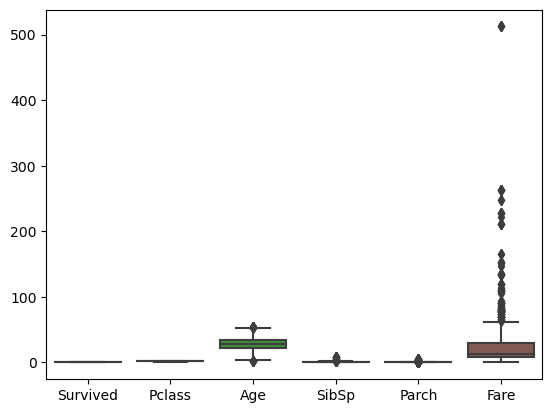

In [16]:
sns.boxplot(data= df_iqr)

In [17]:
df_iqr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [18]:
df3 = df_iqr.copy()

In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 825 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  825 non-null    int64  
 1   Pclass    825 non-null    int64  
 2   Sex       825 non-null    object 
 3   Age       825 non-null    float64
 4   SibSp     825 non-null    int64  
 5   Parch     825 non-null    int64  
 6   Fare      825 non-null    float64
 7   Embarked  825 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 58.0+ KB


In [20]:
y = df3["Survived"]
x = df3.drop("Survived", axis = 1)

In [21]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [22]:
encode = ce.BinaryEncoder(cols= ["Sex", "Embarked"], return_df= True)
x = encode.fit_transform(x)

In [23]:
x

,Pclass,Sex_0,Sex_1,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1
0,3,0,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,1,0
2,3,1,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,3,0,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0,1,27.0,0,0,13.0000,0,1
887,1,1,0,19.0,0,0,30.0000,0,1
888,3,1,0,28.0,1,2,23.4500,0,1
889,1,0,1,26.0,0,0,30.0000,1,0


In [24]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
label_encode.fit(y)
y = label_encode.transform(y)

In [25]:
x.shape, y.shape

((825, 9), (825,))

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
sc.fit(x)
x = sc.transform(x)

In [27]:
x

array([[ 0.79915529, -0.7440916 ,  0.7440916 , ..., -0.48538929,
        -0.61237244,  0.47524139],
       [-1.62921714,  1.34392055, -1.34392055, ...,  0.79717122,
         1.63299316, -2.10419381],
       [ 0.79915529,  1.34392055, -1.34392055, ..., -0.47186932,
        -0.61237244,  0.47524139],
       ...,
       [ 0.79915529,  1.34392055, -1.34392055, ..., -0.16090999,
        -0.61237244,  0.47524139],
       [-1.62921714, -0.7440916 ,  0.7440916 , ..., -0.0297162 ,
         1.63299316, -2.10419381],
       [ 0.79915529, -0.7440916 ,  0.7440916 , ..., -0.4753745 ,
         1.63299316,  0.47524139]])

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_val_test, y_train, y_val_test = train_test_split(x, y, test_size= 0.2, random_state= 42, shuffle= True, stratify= y)
x_test, x_val, y_test, y_val = train_test_split(x_val_test, y_val_test, test_size= 0.5, random_state= 42, stratify= y_val_test)

In [29]:
x_train.shape, x_val.shape, x_test.shape

((660, 9), (83, 9), (82, 9))

In [30]:
y_train.shape, y_val.shape, y_test.shape

((660,), (83,), (82,))

In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
# import tensorflow_addons as tfa
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import sklearn
from tensorflow.keras.layers import BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

# from focal_loss import SparseCategoricalFocalLoss, sparse_categorical_focal_loss
# Xử lý lại chia train test với tấn công nhỏ

from tensorflow.keras import layers
from tensorflow.keras import regularizers

from datetime import datetime
from keras.regularizers import l2

In [32]:
model = Sequential()
#model.add(Dense(32, activation= "relu"))
model.add(Dense(8, activation= "sigmoid"))
model.add(Dense(4, activation= "sigmoid"))
model.add(Dense(1, activation= "sigmoid"))

In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
#fit model
import time
start = time.time()
print('program start...')

history = model.fit(x_train, y_train, epochs = 100, batch_size = 1,validation_data= (x_val, y_val),verbose=1)

#time
end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

#  "Accuracy"


program start...
Epoch 1/100
660/660 [==============================] - 4s 3ms/step - loss: 0.6536 - accuracy: 0.6197 - val_loss: 0.6200 - val_accuracy: 0.6145
Epoch 2/100
660/660 [==============================] - 2s 3ms/step - loss: 0.5830 - accuracy: 0.6939 - val_loss: 0.5408 - val_accuracy: 0.8434
Epoch 3/100
660/660 [==============================] - 2s 3ms/step - loss: 0.5209 - accuracy: 0.8045 - val_loss: 0.4970 - val_accuracy: 0.8193
Epoch 4/100
660/660 [==============================] - 2s 3ms/step - loss: 0.4902 - accuracy: 0.7939 - val_loss: 0.4756 - val_accuracy: 0.8434
Epoch 5/100
660/660 [==============================] - 2s 3ms/step - loss: 0.4735 - accuracy: 0.7955 - val_loss: 0.4677 - val_accuracy: 0.8313
Epoch 6/100
660/660 [==============================] - 2s 3ms/step - loss: 0.4635 - accuracy: 0.7970 - val_loss: 0.4599 - val_accuracy: 0.8313
Epoch 7/100
660/660 [==============================] - 2s 3ms/step - loss: 0.4564 - accuracy: 0.8015 - val_loss: 0.4559 - val

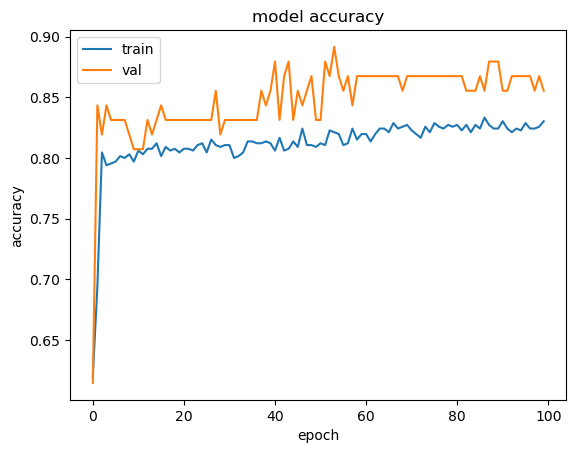

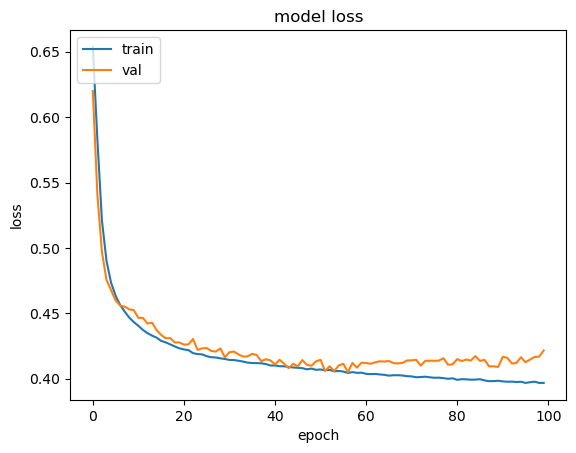

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [36]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep

In [37]:
y_pred = model.predict(x_test).reshape(-1,)

3/3 [==============================] - 0s 0s/step


In [38]:
y_pred = np.array(y_pred, dtype='int32')

In [39]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
accuracy_score(y_test, y_pred)   

0.6219512195121951

In [43]:
precision_score(y_test, y_pred)

c:\Users\ducth\anaconda3\envs\iot\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0